In [1]:
import pandas as pd

In [3]:
product='pacifier'#hair_dryer microwave pacifier
train=pd.read_csv('../Problem_C_Data/'+product+'.tsv', sep='\t', header=0)
# 删除无关字段
train=train.drop(columns=['marketplace','customer_id','review_id','product_id','product_category'])
train['product_title'] = train['product_title'].str.lower()
# 将“n","y"转换成”0","1"
train.replace('n','0',inplace=True)
train.replace('y','1',inplace=True)
train.replace('N','0',inplace=True)
train.replace('Y','1',inplace=True)
# 将字符串类型的数据转换成float
train[['star_rating','helpful_votes','total_votes','vine','verified_purchase']]\
    =train[['star_rating','helpful_votes','total_votes','vine','verified_purchase']].astype('float')
train['product_parent']=train['product_parent'].astype('object')
# 清除表中无关的产品
train=train[train['product_title'].str.contains(product)]     ##!!!product
train.loc[:,'review_date']=pd.to_datetime(train.loc[:,'review_date'],format='%m/%d/%Y', errors='coerce')
train=train.dropna(subset=train.columns,how='any')
train

,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,572944212,"mary meyer wubbanub plush pacifier, lamb",5.0,0.0,0.0,0.0,1.0,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015-08-31
1,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Love 💕,My little girl love this paci contraption!,2015-08-31
2,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,My son loves this one and will only sleep if h...,2015-08-31
3,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,Perfect,2015-08-31
4,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Five Stars,Amazing addition to the nursery!,2015-08-31
...,...,...,...,...,...,...,...,...,...,...
18934,51313971,munchkin deluxe bottle and food warmer with p...,2.0,0.0,0.0,0.0,0.0,Not for bottle liners,We have been using the bottle warmer and have ...,2004-05-24
18935,51313971,munchkin deluxe bottle and food warmer with p...,4.0,1.0,1.0,0.0,0.0,good enough for me,"This isn't the greatest product ever invented,...",2004-04-04
18936,51313971,munchkin deluxe bottle and food warmer with p...,5.0,0.0,0.0,0.0,0.0,I love it!,I love this bottle warmer. After researching ...,2004-04-04
18937,51313971,munchkin deluxe bottle and food warmer with p...,1.0,2.0,2.0,0.0,0.0,save your money,I finally broke down and opened this shower gi...,2003-12-02


In [7]:
# 描述性统计
train.describe()

,star_rating,helpful_votes,total_votes,vine,verified_purchase
count,11049.000000,11049.000000,11049.000000,11049.000000,11049.000000
mean,4.396868,0.594714,0.863698,0.006335,0.880623
std,1.118145,4.366193,5.122051,0.079346,0.324247
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,209.000000,223.000000,1.000000,1.000000


In [9]:
df1=train.groupby(["product_parent"],sort=True).size().reset_index(name='total_rates_count')
df2=train.groupby(["product_parent",'star_rating'],sort=True).size().reset_index(name='stars_rate_count')
merge12 = pd.merge(df1, df2, on='product_parent', how='outer')
# 计算每种商品的每一级评价的比例
merge12['rate_ratio']=merge12['stars_rate_count']/merge12['total_rates_count']
# merge12=merge12.set_index(['product_parent','star_rating'])
merge12

,product_parent,total_rates_count,star_rating,stars_rate_count,rate_ratio
0,4792175,14,5.0,14,1.000000
1,12142513,1,4.0,1,1.000000
2,13588167,1,2.0,1,1.000000
3,21803708,27,2.0,1,0.037037
4,21803708,27,3.0,2,0.074074
...,...,...,...,...,...
1015,997127233,90,1.0,3,0.033333
1016,997127233,90,2.0,3,0.033333
1017,997127233,90,3.0,4,0.044444
1018,997127233,90,4.0,9,0.100000


In [11]:
# 计算每种商品的五星好评比例
most_rated_5=merge12.loc[merge12.loc[:,'star_rating']==5,:].sort_values(by='stars_rate_count')
most_rated_5

,product_parent,total_rates_count,star_rating,stars_rate_count,rate_ratio
810,816382986,1,5.0,1,1.000000
264,352182356,1,5.0,1,1.000000
202,254455198,1,5.0,1,1.000000
831,843386126,1,5.0,1,1.000000
530,516813595,1,5.0,1,1.000000
...,...,...,...,...,...
809,812583172,259,5.0,213,0.822394
597,572944212,493,5.0,373,0.756592
427,450475749,474,5.0,383,0.808017
355,392768822,520,5.0,411,0.790385


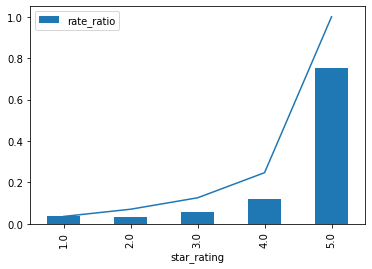

In [13]:
# 描述性统计，查看商品整体的评价比例
import matplotlib.pyplot as plt
%matplotlib inline
tempx=merge12.loc[merge12['product_parent']==most_rated_5.iloc[-1]['product_parent']]['star_rating']
tempy=merge12.loc[merge12['product_parent']==most_rated_5.iloc[-1]['product_parent']]['rate_ratio']
merge12.loc[merge12['product_parent']==most_rated_5.iloc[-1]['product_parent']].plot(x='star_rating',
                                                                                     y='rate_ratio',kind='bar')
tempy = tempy.cumsum()
tempy /= tempy.iloc[-1]
plt.plot(tempx-1,tempy)
fig=plt.gcf()
fig.savefig('star_rating_ratio'+product+'.png')
plt.show()

In [16]:
# 统计每天的评价数量
df3 = train.groupby(["review_date"],sort=True)["star_rating"].size().reset_index(name='rates_count')
df3

,review_date,rates_count
0,2003-04-27,1
1,2003-12-02,1
2,2004-04-04,2
3,2004-05-24,1
4,2004-06-20,1
...,...,...
1889,2015-08-27,19
1890,2015-08-28,9
1891,2015-08-29,9
1892,2015-08-30,10


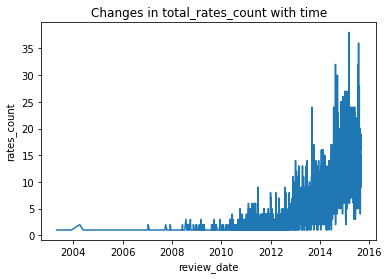

AttributeError: 'list' object has no attribute 'savefig'

In [18]:
# 统计商品的总评价数随时间的变化
#x坐标轴上点的数值
x=df3.loc[:,'review_date']
#y坐标轴上点的数值
y=df3.loc[:,'rates_count']
fig=plt.plot(x,y)
#x轴文本
plt.xlabel('review_date')
#y轴文本
plt.ylabel('rates_count')
#标题
plt.title('Changes in total_rates_count with time')

flt=plt.show()
plt.savefig('changes_in_total_sales'+product+'.png')

,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_rate,review_headline_body
12275,450475749,wubbanub brown monkey pacifier,5.0,1.0,1.0,0.0,1.0,Handy and cute,Worked wonderfully for keeping pacifier in bab...,2013-11-27,1.0,Handy and cuteWorked wonderfully for keeping p...
11940,24160750,nuk 2 pack classic silicone bpa free fashion p...,2.0,2.0,2.0,0.0,1.0,not for babies with big cheeks,My baby loves this pacifer but I don't give it...,2013-12-27,1.0,not for babies with big cheeksMy baby loves th...
12048,892018890,"mam night orthodontic pacifier, boy, 0-6 plus ...",5.0,1.0,1.0,0.0,1.0,Love these,It glows at night so you don't have to turn on...,2013-12-13,1.0,Love theseIt glows at night so you don't have ...
12044,671647927,safety 1st pacifier medicine dispenser,1.0,1.0,1.0,0.0,0.0,Not good!,The npple is very hard! My daughter did not l...,2013-12-13,1.0,Not good!The npple is very hard! My daughter ...
12043,981045906,personalized pacifiers pacifier,5.0,2.0,2.0,0.0,1.0,the color may appear a little different in per...,its cute! its not exactly the same color as sh...,2013-12-13,1.0,the color may appear a little different in per...
...,...,...,...,...,...,...,...,...,...,...,...,...
18804,957640647,"dexbaby womb sounds bear audio pacifier, brown...",5.0,0.0,0.0,0.0,0.0,wonderful bear,excellent addition to any baby's nursery. the ...,2007-06-27,NaN,wonderful bearexcellent addition to any baby's...
18932,51313971,munchkin deluxe bottle and food warmer with p...,5.0,0.0,0.0,0.0,0.0,Excellent Bottle Warmer,We registered for this gift after reading the ...,2005-02-06,NaN,Excellent Bottle WarmerWe registered for this ...
18934,51313971,munchkin deluxe bottle and food warmer with p...,2.0,0.0,0.0,0.0,0.0,Not for bottle liners,We have been using the bottle warmer and have ...,2004-05-24,NaN,Not for bottle linersWe have been using the bo...
18936,51313971,munchkin deluxe bottle and food warmer with p...,5.0,0.0,0.0,0.0,0.0,I love it!,I love this bottle warmer. After researching ...,2004-04-04,NaN,I love it!I love this bottle warmer. After re...


<Figure size 432x288 with 0 Axes>

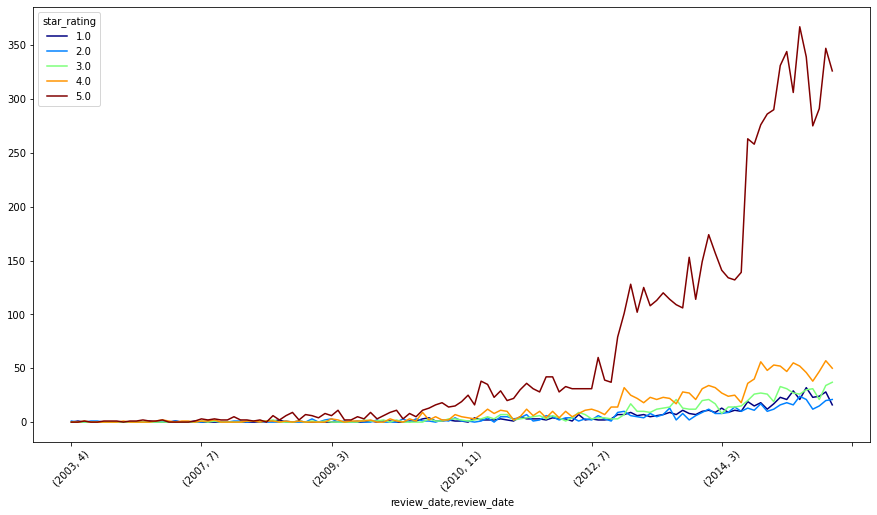

In [22]:
# 统计商品每个分数的评价数量随时间的变化
plt.figure()
reviews_grp = train.groupby([train['review_date'].dt.year, train['review_date'].dt.month, train['star_rating']]).count()['product_parent'].unstack().fillna(0)
bar = reviews_grp.plot(figsize=(15,8), rot=45, colormap='jet')
fig=bar.get_figure()
fig.savefig('5_changes_in_total_sales'+product+'.png')
# 统计每条评价的”有用“投票比例
train['helpful_votes'].fillna(0)
train['total_votes'].fillna(0)
train['helpful_rate']=train['helpful_votes']/train['total_votes']
train.sort_values(by='helpful_rate',ascending=False)

In [14]:
# 将评价标题和正文内容连起来
train['review_headline_body']=train['review_headline']+train['review_body']

In [15]:
# 将缺失值填充为0
train=train.fillna(0)

In [16]:
# 输出清洁完毕的数据
train.to_csv('cleaned_'+product+'.csv')

In [17]:
train

,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_rate,review_headline_body
0,572944212,"mary meyer wubbanub plush pacifier, lamb",5.0,0.0,0.0,0.0,1.0,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015-08-31,0.0,Love this!Perfect match for the Gund Huggybudd...
1,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Love 💕,My little girl love this paci contraption!,2015-08-31,0.0,Love 💕My little girl love this paci contraption!
2,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,My son loves this one and will only sleep if h...,2015-08-31,0.0,Five StarsMy son loves this one and will only ...
3,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,Perfect,2015-08-31,0.0,Five StarsPerfect
4,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Five Stars,Amazing addition to the nursery!,2015-08-31,0.0,Five StarsAmazing addition to the nursery!
...,...,...,...,...,...,...,...,...,...,...,...,...
18934,51313971,munchkin deluxe bottle and food warmer with p...,2.0,0.0,0.0,0.0,0.0,Not for bottle liners,We have been using the bottle warmer and have ...,2004-05-24,0.0,Not for bottle linersWe have been using the bo...
18935,51313971,munchkin deluxe bottle and food warmer with p...,4.0,1.0,1.0,0.0,0.0,good enough for me,"This isn't the greatest product ever invented,...",2004-04-04,1.0,good enough for meThis isn't the greatest prod...
18936,51313971,munchkin deluxe bottle and food warmer with p...,5.0,0.0,0.0,0.0,0.0,I love it!,I love this bottle warmer. After researching ...,2004-04-04,0.0,I love it!I love this bottle warmer. After re...
18937,51313971,munchkin deluxe bottle and food warmer with p...,1.0,2.0,2.0,0.0,0.0,save your money,I finally broke down and opened this shower gi...,2003-12-02,1.0,save your moneyI finally broke down and opened...
